# Using Qiskit Terra


Qiskit Terra contains tools that **define**, **compile** and **execute** quantum circuits on arbitrary **backends**.
It allows users to manipulate qubits by using gates and even construct circuits at the level of **pulses**

## *Constructing a quantum circuit*

In Qiskit the circuits are represented by **QuantumCircuit** class. Below is an example that generates a Belll state:

$$|\psi\rangle = \left(|00\rangle+|11\rangle\right)/\sqrt{2}$$


In [2]:
# Import required fuctions from qiskit
from qiskit import QuantumCircuit

In [3]:
bell = QuantumCircuit(2, 2)  # QuantumCircuit(2, 2) # A QuantumCircuit with 2 qubits and 2 classical bits

bell.h(0)                    # bell.h(qr[0])
bell.cx(0, 1)                # bell.cx(qr[0], qr[1])
bell.measure([0,1], [0,1])   # Measure
bell.draw(output='mpl')

## *Creating circuits examples*

In [4]:
# Construct a 5-qubit GHZ circuit.
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1, 5))
qc.measure_all()
qc.draw(output='mpl')

In [5]:
# Construct a 4-qubit Berstein-Vazirani circuit using registers.
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(3)
qc.h(range(3))
qc.cx(range(3), 3)
qc.h(range(3))
qc.barrier(range(3))
qc.measure(range(3), range(3))

qc.draw(output='mpl')


Additional gates can be found in our qiskit tutorials on Github<br/>
[List of quantum operations](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)

In [6]:
# Get the qasm
print(bell.qasm())

In [8]:
# Circuit can be created using qasm() code string

qasm_string= '''
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
'''

In [9]:
# create the circuit from qasm string 
circuit = QuantumCircuit.from_qasm_str(qasm_string)
circuit.draw(output='mpl')

## *Executing the circuit on a simulator backend*

In [10]:
from qiskit import Aer, execute

# pick a backend, in this case a simulator
backend = Aer.get_backend('qasm_simulator')

# start a simulation job on the backend
job = execute(circuit, backend, shots=1000)

# collect the job results and display them
result = job.result()
counts = result.get_counts(circuit)
print(counts)

In [11]:
# plot the distribution probabilities
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## *Executing the circuit on a real device*

In [12]:
from qiskit import IBMQ

# load your account
IBMQ.load_account()

# set your provider 
# provider=IBMQ.get_provider(hub='<your hub>', project='<your project>', group='<your group')

provider=IBMQ.get_provider(hub='ibm-q-internal', project='core-team', group='support')


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [48]:
# print only the real backends of your provider and those with a number of qubits greater than 1

from qiskit import IBMQ
backends=list(filter(lambda device:device.configuration().num_qubits>1, provider.backends(simulator=False)))


In [49]:
from qiskit.providers.ibmq import least_busy
backends = list(filter(lambda device:device.configuration().num_qubits>1, provider.backends(simulator=False)))
backend = least_busy(backends)
print('The least busy backend is: ', backend.name())

# start a job on the backend
job = execute(circuit, backend, shots=1000)

# monitor the job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

# collect the job results and display them
result = job.result()
counts = result.get_counts(circuit)
print(counts)

The least busy backend is:  ibmq_valencia
Job Status: job has successfully run
{'11': 445, '10': 22, '00': 510, '01': 23}


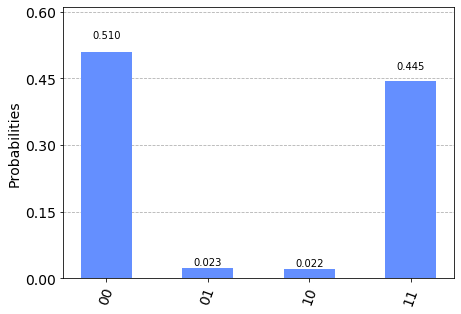

In [50]:
plot_histogram(counts)

## *Now it's your turn to play!*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the first challenge for you: In the following cells, create a GHZ (Greenberger, Horne and Zeilinger) circuit, to produce a three maximally entangled quantum states 
</div>

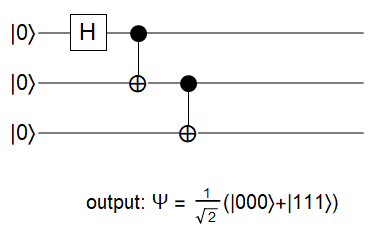

In [ ]:
# Create the QuantumCircuit "qhz" 

                 
# Add gates 


# Add measure (all qubits)


# Draw the circuit 


In [ ]:
# execute your circuit using your primary backend "ibmq_singapore" 


# monitor the job 


# collect the job results and display them


## *Circuits operations*

### *Addition of circuits*

In [14]:
# You can combine differents circuits into one. But they have to share the same amount of registers

circuit1 = QuantumCircuit(3,3)
circuit1.h(0)
circuit1.x(1)

circuit2 = QuantumCircuit(3,3)
circuit2.cx(0,2)

circuit3 = QuantumCircuit(3,3)
circuit3.measure(range(3),range(3))

full_circuit=circuit1+circuit2+circuit3

# draw the circuits 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=4)

circuit1.draw(output='mpl',scale=2, ax=ax[0])
circuit2.draw(output='mpl',scale=2, ax=ax[1])
circuit3.draw(output='mpl',scale=2,  ax=ax[2])
full_circuit.draw(output='mpl',scale=2, ax=ax[3])

### *Compose circuit with ``other`` circuit or instruction*

In [15]:
# It's possible to compose circuits in qiskit
big_circ=QuantumCircuit(4)
big_circ.h(0)
big_circ.x(2)
big_circ.cx(0,1)
big_circ.cx(2,3)


sub_circ = QuantumCircuit(3, name='sub_circ') #The second circuit must have the same or less amount of qubits
sub_circ.h(0)
sub_circ.ccx(0,1,2)
sub_circ.barrier()
sub_circ.id(1)
sub_circ.u3(1, 2, -2, 0)

fig, ax = plt.subplots(nrows=1, ncols=2)
big_circ.draw(output='mpl', ax=ax[0])
sub_circ.draw(output='mpl',scale=2, ax=ax[1])


###  *We compose a full circuit from the big_circ and the sub_circ circuits*

In [16]:
full_circ = big_circ.compose(sub_circ, [1,2,3]) # specify which qubits in the big circuit to add the sub circuit

full_circ.draw(output='mpl')

###  *We can also create a circuit by appending directly a circuit to an existing one*

In [17]:
# You can also append directly the sub circuit to the big circuit
big_circ.append(sub_circ, [1,2,3])

big_circ.draw(output='mpl')

###  *You can visualize the overall circuit gates by decomposing it*

In [18]:
# To visualize the full circuit you have to decompose it
# note the decomposition of the Hadamard and Not gates into U2 and U3 gates
big_circ.decompose().draw(output='mpl')

## *Now it's your turn to play!*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the second challenge for you: Qiskit Terra gives the possibility to create a unitary gate out of a quantum circuit. The result is then a composite gate encapsulating this circuit. 
Consider the circuit below: 


  - Convert that circuit into a gate (refer to https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html)
  - Add that gate to a Quantum Circuit (you must create first a QuantumCircuit)
       - Create a new QuantumCircuit (you must create first a QuantumCircuit because you cannot draw a gate without a circuit)
       - Append the gate to your QuantumCircuit 
  - Draw that circuit 
  - Decompose that circuit one level and draw the decomposition
    
    
 </div>



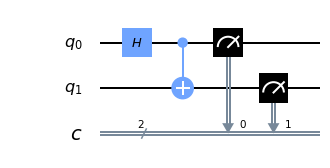

In [20]:
from qiskit import QuantumCircuit

simple_circ=QuantumCircuit(2)
simple_circ.h(0)
simple_circ.x(1)
circuit.draw(output='mpl')

In [ ]:
# Convert that circuit to a gate 



In [ ]:
# create a new QuantumCircuit and append the gate to that circuit


In [ ]:
# draw the circuit 


In [ ]:
# decompose that circuit one level and draw the decomposition


<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the third challenge for you: Qiskit Terra gives the possibility to create a unitary "controlled gate" from a circuit. 

  - Convert the circuit (simple_circ) into a controlled gate (refer to https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html)
  - Add that controlled gate to a Quantum Circuit (you must create first a QuantumCircuit)
       - Create a new QuantumCircuit (you must create first a QuantumCircuit because you cannot draw a gate without a circuit)
       - Append the controlled gate to your QuantumCircuit 
  - Draw that circuit 
  - Decompose the circuit one level and draw the decomposition 

In [ ]:
# create a controlled gate from the circuit (simple_circ)



In [ ]:
# create a new QuantumCircuit and append the controlled gate to it 



In [ ]:
# draw the QuantumCircuit 



In [ ]:
# decompose one level that circuit and draw the decomposition 
